In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
# pd.reset_option('display.max_columns')
# pd.reset_option('display.width')

import os
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 파일 경로
file_path = '/content/drive/MyDrive/1데이콘/Track1알고리즘부문:K리그-서울시립대공개AI경진대회/dataset/'

# 데이터 로드
try:
  train_df = pd.read_csv(file_path + 'train.csv')
  test_df = pd.read_csv(file_path + 'test.csv')
  match_df = pd.read_csv(file_path + 'match_info.csv')
  print('data load success')
except Exception as e:
  print(f'data load fail: {e}')

# 데이터 모양 확인
print(f'train: {train_df.shape}, test: {test_df.shape}, match_df: {match_df.shape}')

data load success
train: (356721, 15), test: (2414, 3), match_df: (228, 17)


In [ ]:
# test data + path data
test_events_list = []
for _, row in test_df.iterrows():
  re_path = os.path.normpath(file_path + row['path'])
  # re_path = Path(file_path + row['path']).resolve()
  df_ep = pd.read_csv(re_path)
  test_events_list.append(df_ep)

test_events = pd.concat(test_events_list, ignore_index=True)
print(test_events.shape)

(53110, 15)


In [ ]:
# 데이터 요약
def eda(df):
  print(df.info())
  print('-' * 50)
  print(df.head())

In [ ]:
eda(train_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356721 entries, 0 to 356720
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   game_id       356721 non-null  int64  
 1   period_id     356721 non-null  int64  
 2   episode_id    356721 non-null  int64  
 3   time_seconds  356721 non-null  float64
 4   team_id       356721 non-null  int64  
 5   player_id     356721 non-null  int64  
 6   action_id     356721 non-null  int64  
 7   type_name     356721 non-null  object 
 8   result_name   216467 non-null  object 
 9   start_x       356721 non-null  float64
 10  start_y       356721 non-null  float64
 11  end_x         356721 non-null  float64
 12  end_y         356721 non-null  float64
 13  is_home       356721 non-null  bool   
 14  game_episode  356721 non-null  object 
dtypes: bool(1), float64(5), int64(6), object(3)
memory usage: 38.4+ MB
None
--------------------------------------------------
   game_id  p

In [ ]:
eda(test_events)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53110 entries, 0 to 53109
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   game_id       53110 non-null  int64  
 1   period_id     53110 non-null  int64  
 2   episode_id    53110 non-null  int64  
 3   time_seconds  53110 non-null  float64
 4   team_id       53110 non-null  int64  
 5   player_id     53110 non-null  int64  
 6   action_id     53110 non-null  int64  
 7   type_name     53110 non-null  object 
 8   result_name   31981 non-null  object 
 9   start_x       53110 non-null  float64
 10  start_y       53110 non-null  float64
 11  end_x         50696 non-null  float64
 12  end_y         50696 non-null  float64
 13  is_home       53110 non-null  bool   
 14  game_episode  53110 non-null  object 
dtypes: bool(1), float64(5), int64(6), object(3)
memory usage: 5.7+ MB
None
--------------------------------------------------
   game_id  period_id  episode_id

In [ ]:
eda(match_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   game_id            228 non-null    int64 
 1   season_id          228 non-null    int64 
 2   competition_id     228 non-null    int64 
 3   game_day           228 non-null    int64 
 4   game_date          228 non-null    object
 5   home_team_id       228 non-null    int64 
 6   away_team_id       228 non-null    int64 
 7   home_score         228 non-null    int64 
 8   away_score         228 non-null    int64 
 9   venue              228 non-null    object
 10  competition_name   228 non-null    object
 11  country_name       228 non-null    object
 12  season_name        228 non-null    int64 
 13  home_team_name     228 non-null    object
 14  home_team_name_ko  228 non-null    object
 15  away_team_name     228 non-null    object
 16  away_team_name_ko  228 non-null    object
dt

In [ ]:
# 데이터 합치기
train_df['is_train'] = 1
test_events['is_train'] = 0

all_df = pd.concat([train_df, test_events], sort=False).reset_index(drop=True)

# match_info에 중복된 데이터가 없는지 확인
match_df = match_df.drop_duplicates('game_id')
all_df = pd.merge(all_df, match_df, on='game_id', how='left')
print(f'after df size: {all_df.shape}')

after df size: (409831, 32)


In [ ]:
all_df

,game_id,period_id,episode_id,time_seconds,team_id,player_id,action_id,type_name,result_name,start_x,start_y,end_x,end_y,is_home,game_episode,is_train,season_id,competition_id,game_day,game_date,home_team_id,away_team_id,home_score,away_score,venue,competition_name,country_name,season_name,home_team_name,home_team_name_ko,away_team_name,away_team_name_ko
0,126283,1,1,0.667,2354,344559,0,Pass,Successful,52.418205,33.485444,31.322445,38.274752,True,126283_1,1,3669,587,1,2024-03-01 05:00:00,2354,4639,1,0,문수월드컵경기장,K League 1,KR,2024,Ulsan HD FC,울산 HD FC,Pohang Steelers,포항 스틸러스
1,126283,1,1,3.667,2354,250036,2,Pass,Successful,32.013240,38.100808,37.371285,30.632980,True,126283_1,1,3669,587,1,2024-03-01 05:00:00,2354,4639,1,0,문수월드컵경기장,K League 1,KR,2024,Ulsan HD FC,울산 HD FC,Pohang Steelers,포항 스틸러스
2,126283,1,1,4.968,2354,500145,4,Carry,NaN,37.371285,30.632980,38.391570,24.613144,True,126283_1,1,3669,587,1,2024-03-01 05:00:00,2354,4639,1,0,문수월드컵경기장,K League 1,KR,2024,Ulsan HD FC,울산 HD FC,Pohang Steelers,포항 스틸러스
3,126283,1,1,8.200,2354,500145,5,Pass,Successful,38.391570,24.613144,34.573350,5.545468,True,126283_1,1,3669,587,1,2024-03-01 05:00:00,2354,4639,1,0,문수월드컵경기장,K League 1,KR,2024,Ulsan HD FC,울산 HD FC,Pohang Steelers,포항 스틸러스
4,126283,1,1,11.633,2354,142106,7,Pass,Successful,34.578705,6.058256,21.274470,18.437112,True,126283_1,1,3669,587,1,2024-03-01 05:00:00,2354,4639,1,0,문수월드컵경기장,K League 1,KR,2024,Ulsan HD FC,울산 HD FC,Pohang Steelers,포항 스틸러스
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409826,153392,2,107,2905.168,4657,213491,2631,Carry,NaN,60.501840,26.857620,65.639595,30.454276,True,153392_107,0,3669,587,38,2024-11-24 05:00:00,4657,4641,-1,-1,대전월드컵경기장,K League 1,KR,2024,Daejeon Hana Citizen,대전 하나 시티즌,Jeju United,제주SK FC
409827,153392,2,107,2906.467,4657,213491,2632,Pass,Successful,65.639595,30.454276,NaN,NaN,True,153392_107,0,3669,587,38,2024-11-24 05:00:00,4657,4641,-1,-1,대전월드컵경기장,K League 1,KR,2024,Daejeon Hana Citizen,대전 하나 시티즌,Jeju United,제주SK FC
409828,153392,2,108,2958.600,4657,287281,2638,Pass_Corner,Successful,104.325690,66.533736,83.532750,47.606460,True,153392_108,0,3669,587,38,2024-11-24 05:00:00,4657,4641,-1,-1,대전월드컵경기장,K League 1,KR,2024,Daejeon Hana Citizen,대전 하나 시티즌,Jeju United,제주SK FC
409829,153392,2,108,2961.200,4657,213491,2640,Pass,Successful,85.267560,49.911728,92.373750,64.096256,True,153392_108,0,3669,587,38,2024-11-24 05:00:00,4657,4641,-1,-1,대전월드컵경기장,K League 1,KR,2024,Daejeon Hana Citizen,대전 하나 시티즌,Jeju United,제주SK FC


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

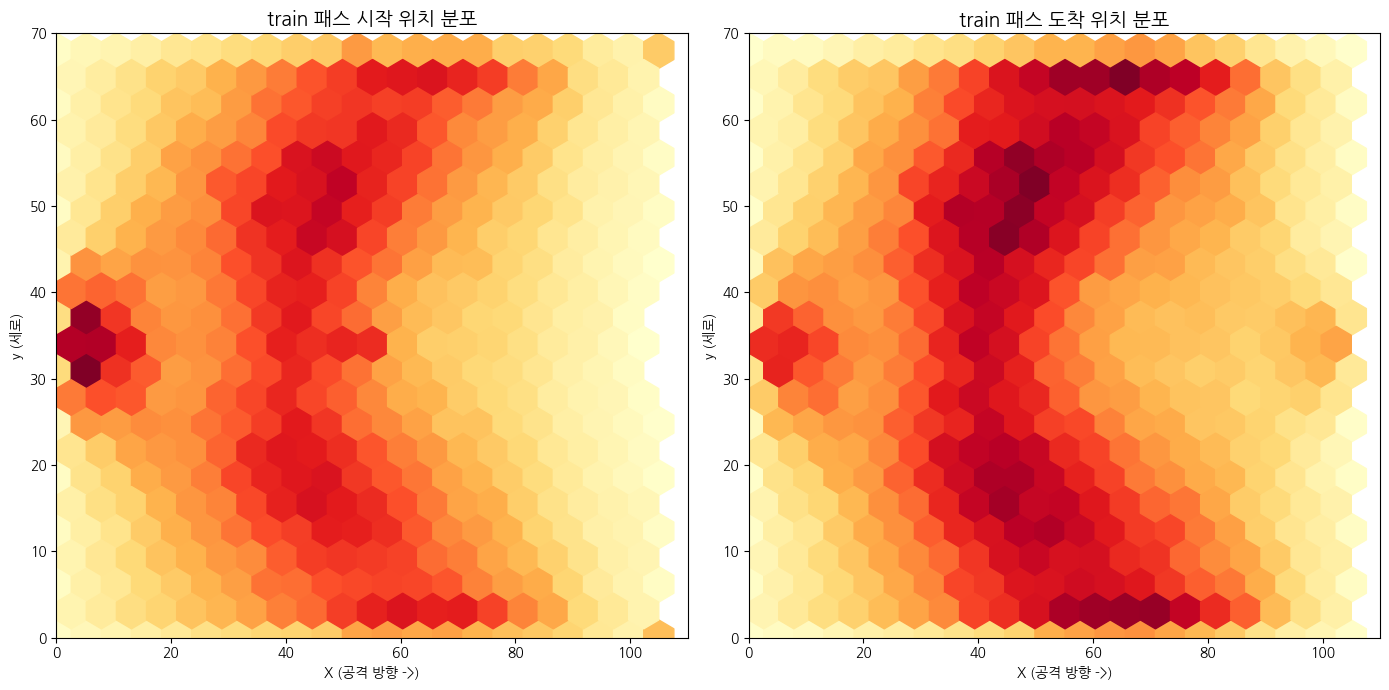

In [ ]:
# train data 경기장 구역별 패스 빈도 히트맵
fig, axes = plt.subplots(1, 2, figsize=(14,7))

# 패스 시작 위치
axes[0].hexbin(train_df['start_x'], train_df['start_y'],
               gridsize=20, cmap='YlOrRd', mincnt=10)
axes[0].set_title('train 패스 시작 위치 분포', fontsize=14)
axes[0].set_xlabel('X (공격 방향 ->)')
axes[0].set_ylabel('y (세로)')
axes[0].set_xlim(0, 110)
axes[0].set_ylim(0, 70)

# 패스 도착 위치
axes[1].hexbin(train_df['end_x'], train_df['end_y'],
               gridsize=20, cmap='YlOrRd', mincnt=10)
axes[1].set_title('train 패스 도착 위치 분포', fontsize=14)
axes[1].set_xlabel('X (공격 방향 ->)')
axes[1].set_ylabel('y (세로)')
axes[1].set_xlim(0, 110)
axes[1].set_ylim(0, 70)
plt.tight_layout()
plt.show()

# 패스는 주로 중앙에서 시작해 양쪽 측면으로 이어지는 전방으로 전개됨

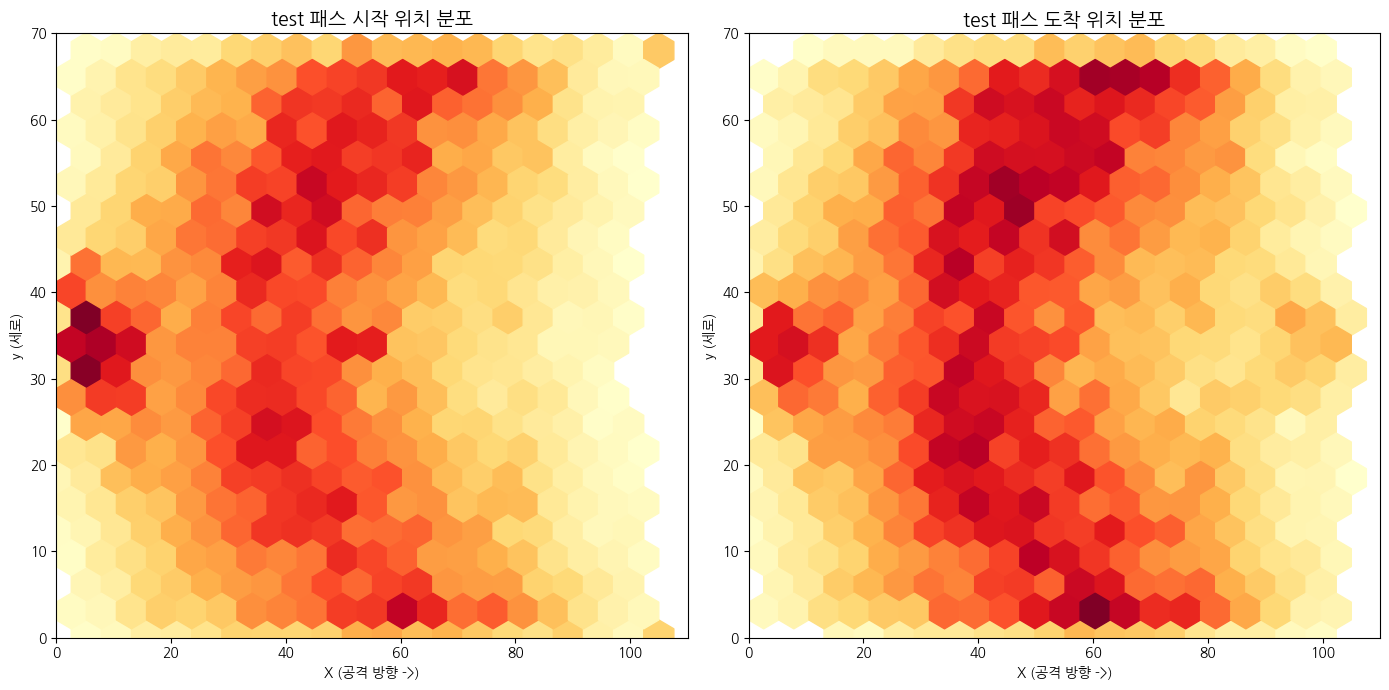

In [ ]:
# test data 경기장 구역별 패스 빈도 히트맵
fig, axes = plt.subplots(1, 2, figsize=(14,7))

# 패스 시작 위치
axes[0].hexbin(test_events['start_x'], test_events['start_y'],
               gridsize=20, cmap='YlOrRd', mincnt=10)
axes[0].set_title('test 패스 시작 위치 분포', fontsize=14)
axes[0].set_xlabel('X (공격 방향 ->)')
axes[0].set_ylabel('y (세로)')
axes[0].set_xlim(0, 110)
axes[0].set_ylim(0, 70)

# 패스 도착 위치
axes[1].hexbin(test_events['end_x'], test_events['end_y'],
               gridsize=20, cmap='YlOrRd', mincnt=10)
axes[1].set_title('test 패스 도착 위치 분포', fontsize=14)
axes[1].set_xlabel('X (공격 방향 ->)')
axes[1].set_ylabel('y (세로)')
axes[1].set_xlim(0, 110)
axes[1].set_ylim(0, 70)
plt.tight_layout()
plt.show()

# train data와 동일한 패턴을 보이며 주로 왼쪽 중앙 및 측면 지역에서 많은 패스가 이루어짐

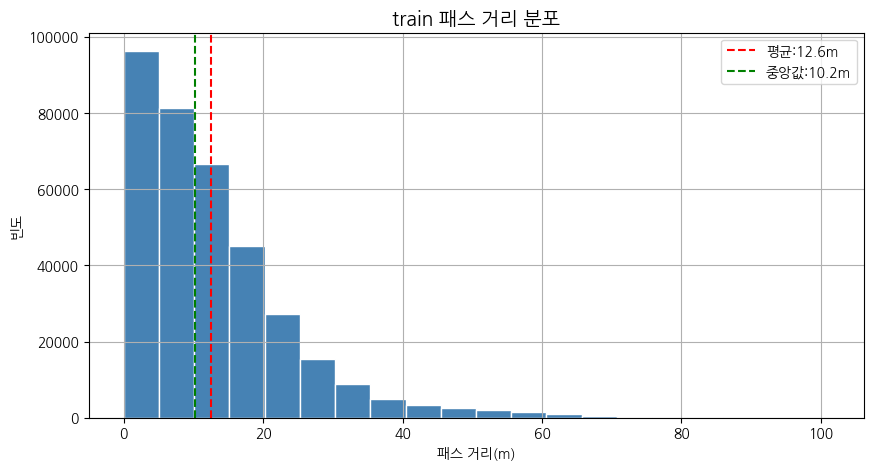

In [ ]:
# train data 패스 거리 분포
train_df['pass_distance'] = np.sqrt(
    (train_df['end_x'] - train_df['start_x'])**2 +
    (train_df['end_y'] - train_df['start_y']) **2
)

fix, ax = plt.subplots(figsize=(10,5))

train_df['pass_distance'].hist(bins=20, color='steelblue', edgecolor='white',ax=ax)
ax.axvline(train_df['pass_distance'].mean(), color='red', linestyle='--',
           label = f'평균:{train_df['pass_distance'].mean():.1f}m')
ax.axvline(train_df['pass_distance'].median(), color='green', linestyle='--',
           label = f'중앙값:{train_df['pass_distance'].median():.1f}m')


ax.set_title('train 패스 거리 분포', fontsize=14)
ax.set_xlabel('패스 거리(m)')
ax.set_ylabel('빈도')
ax.legend()
plt.show()

# print((train_df['pass_distance'] < 15).sum() / len(train_df) * 100)

# 평균 패스 거리는 약 12.6m
# 15m 이하의 숏패스가 전체의 68%

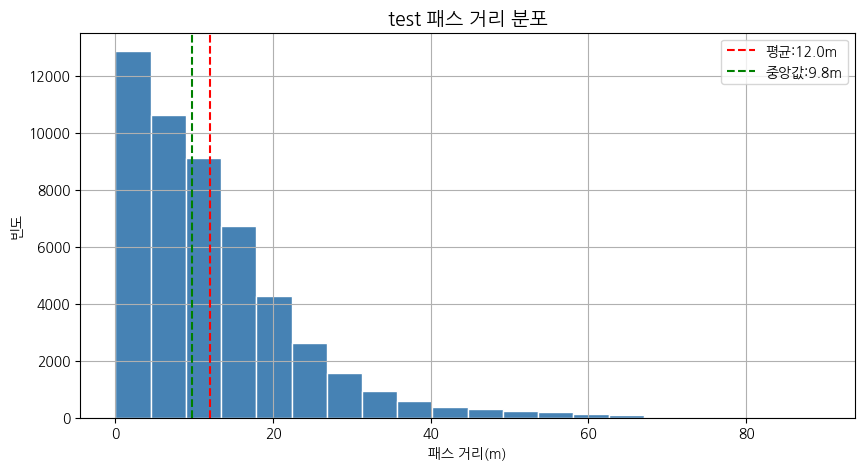

In [ ]:
# test data 패스 거리 분포
# test_events = test_events.dropna(['end_x', 'end_y'], axis=0)
test_events['pass_distance'] = np.sqrt(
    (test_events['end_x'] - test_events['start_x'])**2 +
    (test_events['end_y'] - test_events['start_y']) **2
)

fix, ax = plt.subplots(figsize=(10,5))

test_events['pass_distance'].hist(bins=20, color='steelblue', edgecolor='white', ax=ax)
ax.axvline(test_events['pass_distance'].mean(), color='red', linestyle='--',
           label = f'평균:{test_events['pass_distance'].mean():.1f}m')
ax.axvline(test_events['pass_distance'].median(), color='green', linestyle='--',
           label = f'중앙값:{test_events['pass_distance'].median():.1f}m')


ax.set_title('test 패스 거리 분포', fontsize=14)
ax.set_xlabel('패스 거리(m)')
ax.set_ylabel('빈도')
ax.legend()
plt.show()

# print((test_events['pass_distance'] < 15).sum() / len(test_events) * 100)

# 평균 패스 거리는 약 12.0m
# 15m 이하의 숏패스가 전체의 66%
# train data와 큰 차이는 보이지 않음

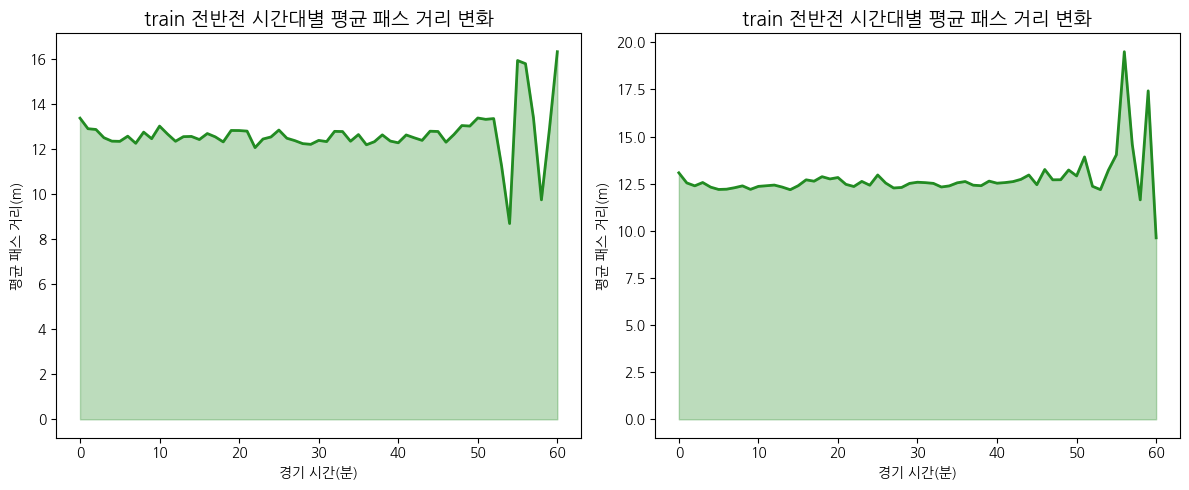

In [ ]:
# train data 시간대별 패스 패턴 변화
train_df['minute_first'] = train_df[train_df['period_id']==1]['time_seconds'] // 60
minute_stats_first = train_df.groupby('minute_first')['pass_distance'].mean().reset_index()

fig, axex= plt.subplots(1,2, figsize=(12, 5))
axex[0].plot(minute_stats_first['minute_first'], minute_stats_first['pass_distance'],
        color='forestgreen', linewidth=2)
# axex[0].axvline(45, color='red', linestyle='--', alpha=0.7, label='하프타임')
axex[0].fill_between(minute_stats_first['minute_first'], minute_stats_first['pass_distance'], alpha=0.3, color='forestgreen')
axex[0].set_title('train 전반전 시간대별 평균 패스 거리 변화', fontsize=14)
axex[0].set_xlabel('경기 시간(분)')
axex[0].set_ylabel('평균 패스 거리(m)')

train_df['minute_second'] = train_df[train_df['period_id']==2]['time_seconds'] // 60
minute_stats_second = train_df.groupby('minute_second')['pass_distance'].mean().reset_index()

axex[1].plot(minute_stats_second['minute_second'], minute_stats_second['pass_distance'],
        color='forestgreen', linewidth=2)
# axex[1].axvline(45, color='red', linestyle='--', alpha=0.7, label='하프타임')
axex[1].fill_between(minute_stats_second['minute_second'], minute_stats_second['pass_distance'], alpha=0.3, color='forestgreen')
axex[1].set_title('train 후반전 시간대별 평균 패스 거리 변화', fontsize=14)
axex[1].set_xlabel('경기 시간(분)')
axex[1].set_ylabel('평균 패스 거리(m)')

plt.tight_layout()
plt.show()

# 전반전 후반전 모두 종료전에는 패스 거리가 늘어남

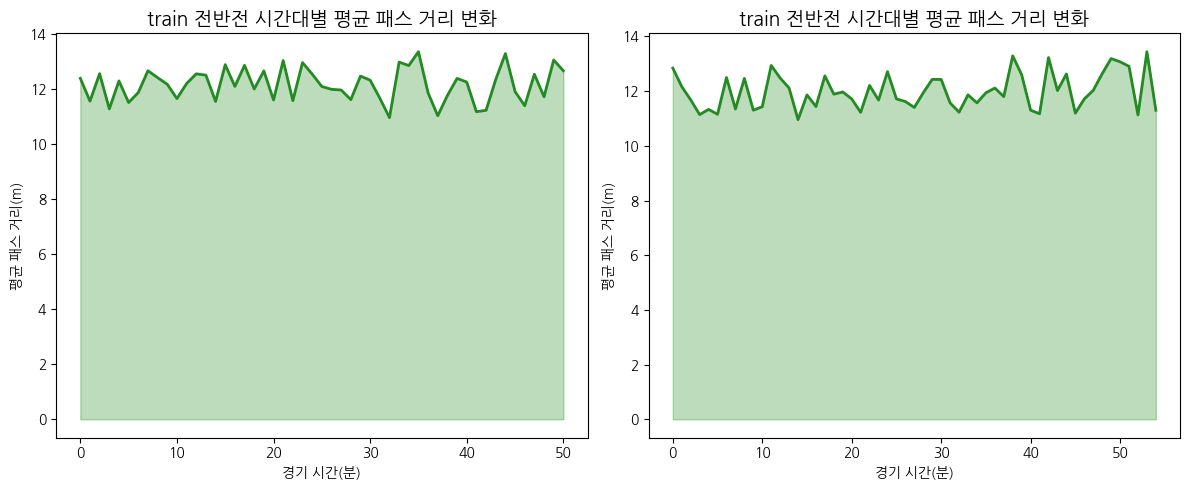

In [ ]:
# test data 시간대별 패스 패턴 변화
test_events['minute_first'] = test_events[test_events['period_id']==1]['time_seconds'] // 60
minute_stats_first = test_events.groupby('minute_first')['pass_distance'].mean().reset_index()

fig, axex= plt.subplots(1,2, figsize=(12, 5))
axex[0].plot(minute_stats_first['minute_first'], minute_stats_first['pass_distance'],
        color='forestgreen', linewidth=2)
# axex[0].axvline(45, color='red', linestyle='--', alpha=0.7, label='하프타임')
axex[0].fill_between(minute_stats_first['minute_first'], minute_stats_first['pass_distance'], alpha=0.3, color='forestgreen')
axex[0].set_title('test 전반전 시간대별 평균 패스 거리 변화', fontsize=14)
axex[0].set_xlabel('경기 시간(분)')
axex[0].set_ylabel('평균 패스 거리(m)')

test_events['minute_second'] = test_events[test_events['period_id']==2]['time_seconds'] // 60
minute_stats_second = test_events.groupby('minute_second')['pass_distance'].mean().reset_index()

axex[1].plot(minute_stats_second['minute_second'], minute_stats_second['pass_distance'],
        color='forestgreen', linewidth=2)
# axex[1].axvline(45, color='red', linestyle='--', alpha=0.7, label='하프타임')
axex[1].fill_between(minute_stats_second['minute_second'], minute_stats_second['pass_distance'], alpha=0.3, color='forestgreen')
axex[1].set_title('test 후반전전 시간대별 평균 패스 거리 변화', fontsize=14)
axex[1].set_xlabel('경기 시간(분)')
axex[1].set_ylabel('평균 패스 거리(m)')

plt.tight_layout()
plt.show()

# train data와 다르게 패스 거리의 큰 변화가 없음

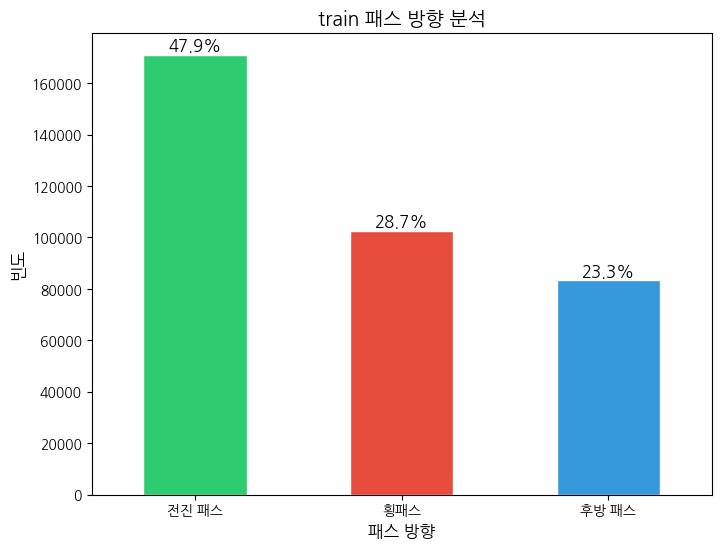

In [ ]:
# train 패스 방향
threshold = 2.0
diff_x = train_df['end_x'] - train_df['start_x']

train_df['pass_direction'] = np.where(
    diff_x > threshold, '전진 패스',
    np.where(diff_x < -threshold, '후방 패스', '횡패스')
)
direction_counts = train_df['pass_direction'].value_counts()
total = direction_counts.sum()
offset = direction_counts.max() * 0.01

fig, ax= plt.subplots(figsize=(8, 6))
colors = ['#2ecc71', '#e74c3c', '#3498db']
direction_counts.plot(kind='bar', color=colors, edgecolor='white', ax=ax)
ax.set_title('train 패스 방향 분석', fontsize=14)
ax.set_xlabel('패스 방향', fontsize=12)
ax.set_ylabel('빈도', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

for i, v in enumerate(direction_counts):
    ax.text(i, v + offset, f'{v/total*100:.1f}%', ha='center', fontsize=12)

plt.show()

# 전진패스가 47.9%로 가장 많음
# k리그는 공격적인 축구 스타일을 선호

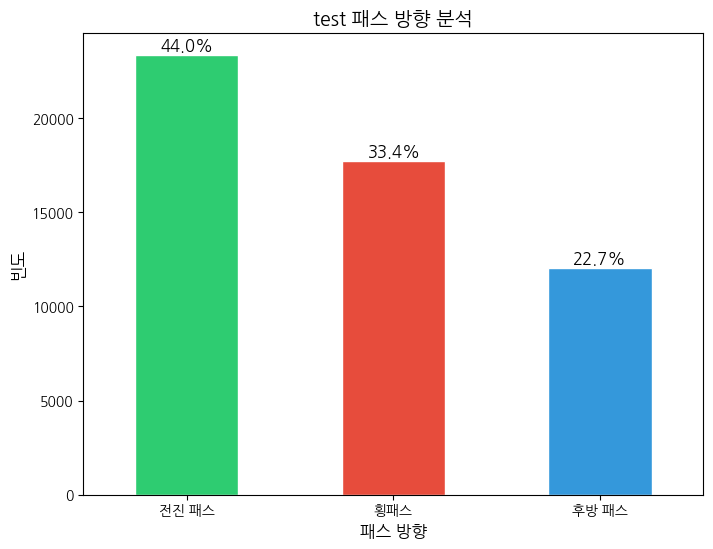

In [ ]:
# test 패스 방향
threshold = 2.0
diff_x = test_events['end_x'] - test_events['start_x']

test_events['pass_direction'] = np.where(
    diff_x > threshold, '전진 패스',
    np.where(diff_x < -threshold, '후방 패스', '횡패스')
)
direction_counts = test_events['pass_direction'].value_counts()
total = direction_counts.sum()
offset = direction_counts.max() * 0.01

fig, ax= plt.subplots(figsize=(8, 6))
colors = ['#2ecc71', '#e74c3c', '#3498db']
direction_counts.plot(kind='bar', color=colors, edgecolor='white', ax=ax)
ax.set_title('test 패스 방향 분석', fontsize=14)
ax.set_xlabel('패스 방향', fontsize=12)
ax.set_ylabel('빈도', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

for i, v in enumerate(direction_counts):
  ax.text(i, v + offset, f'{v/total*100:.1f}%', ha='center', fontsize=12)

plt.show()

# 전진패스가 44.0%로 가장 많음
# k리그는 공격적인 축구 스타일을 선호
# train 대비 횡패스의 비중이 높음